In [1]:
import tensorflow as tf

In [2]:
from  tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist=input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001B504277780>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001B50877E6A0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001B506114320>)

In [5]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [6]:
mnist.train.labels # y is hot encoded now like for three it is 0010000000

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [7]:
#flattened images 26*28 flattened as 784

In [8]:
mnist.test.images.shape

(10000, 784)

In [9]:
mnist.validation.images.shape

(5000, 784)

In [10]:
import numpy as np 
from matplotlib import pyplot as plt

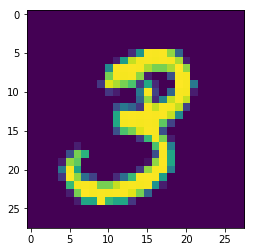

In [11]:
first_image=mnist.train.images[1]
first_image=np.array(first_image,dtype='float')
first_image=first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [19]:
#R
with tf.Session() as sess:
    print(tf.random_normal([1,2]).eval())


[[0.12453827 1.0895607 ]]


In [21]:
n_input=784
n_hidden_1=256
n_hidden_2=256
n_classes=10

weights = {
    'h1' : tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

biases = {
    'h1' : tf.Variable(tf.random_normal([n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_classes]))
}

In [26]:
def forward_propogation(x,weights,biases):
    in_layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    out_layer1=tf.nn.relu(in_layer1)
    
    in_layer2=tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
    out_layer2=tf.nn.relu(in_layer2)
    
    output=tf.add(tf.matmul(out_layer1,weights['out']),biases['out'])
    return output

In [94]:
tf.trainable_variables()#these are  those which optimizer can change ; by default all true

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>]

In [66]:
x=tf.placeholder('float',[None,n_input])
y=tf.placeholder(tf.int32,[None,n_classes])
pred=forward_propogation(x,weights,biases)
pred

<tf.Tensor 'Add_26:0' shape=(?, 10) dtype=float32>

In [95]:
#mean cost 
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

In [96]:
#optimizing the cost
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
optimize=optimizer.minimize(cost)

In [103]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [98]:
# WAY 1 GRADIENT DESCENT ON TOTAL TRAINING DATASET
#on training data calling the optimizer  on cost ; more you run this cell more it optimizes
for i in range(25):
    c, _=sess.run([cost,optimize],feed_dict={x:mnist.train.images,y:mnist.train.labels})
    print(c)

142.20721
94.34539
68.93006
59.48081
51.997826
42.24563
32.6205
25.544214
21.538889
19.588879
18.465792
17.365206
16.0819
14.759818
13.605782
12.679964
11.948087
11.340564
10.816171
10.360134
9.955777
9.5756445
9.18915
8.789942
8.396942


In [105]:
### WAY2  BATCH GRADIENT DESCENT
batch_size=100
for i in range(25):
    num_batches=int(mnist.train.num_examples/batch_size)
    total_cost=0
    for j in range(num_batches):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        c, _=sess.run([cost,optimize],feed_dict={x:batch_x,y:batch_y})
        total_cost+=c
    print(total_cost)

3284.0153452157974
712.0059143311519
381.61027831651154
232.94805570309495
177.88048141923912
138.66544145530568
105.727985538762
102.83665828514901
91.75108568357507
90.09025814537847
83.29557554357018
84.71516161872418
70.55656601797203
62.81297425748069
62.667011121896294
65.25185086727771
65.02909921421144
58.757825849209475
50.04025344387509
56.941768805063454
50.14569068515058
51.228307046888915
57.28842226344324
42.321487132298984
52.446964008737375


In [106]:
#TESTING PHASE
predictions = tf.argmax(pred,1) # takinng max probabilty on axis 1 
true_labels=tf.argmax(y,1)
correct_predictions=tf.equal(predictions,true_labels)

In [107]:
predictions_eval,labels,correct_pred=sess.run([predictions,true_labels,correct_predictions],feed_dict={x:mnist.test.images,y:mnist.test.labels})
predictions_eval,labels,correct_pred

(array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([ True,  True,  True, ...,  True,  True,  True]))

In [108]:
correct_pred.sum() #total correct predictions  for 10000 images

9760

In [102]:
#got 85.27 percent accuracy with total gradient descent

In [110]:
#got 97.60 percent accuracy with batch gradient descent